In [ ]:
# load the required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
fake = pd.read_csv('/content/fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true = pd.read_csv("/content/true.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake['class'] = 'fake'
fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [ ]:
true['class'] = 'true'
true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [ ]:
print(fake.shape)
print(true.shape)

(23481, 5)
(21417, 5)


In [ ]:
data = pd.concat([fake,true], ignore_index=True)
print(data.shape)

(44898, 5)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [ ]:
data.duplicated().sum()

209

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   class    44689 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


<Axes: >

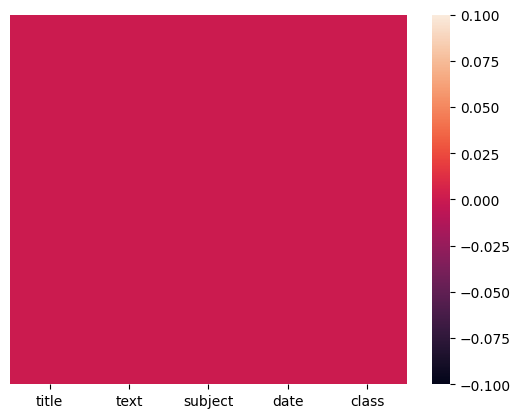

In [ ]:
sns.heatmap(data.isnull(),annot=False,yticklabels=False)

In [ ]:
data['date'] = pd.to_datetime(data['date'],format='mixed', dayfirst=True,errors='coerce')
data['date'].head()

,date
0,2017-12-31
1,2017-12-31
2,2017-12-30
3,2017-12-29
4,2017-12-25


In [ ]:
data['day'] = pd.to_datetime(data['date'],format='mixed', dayfirst=True,errors='coerce').dt.day
data['day'].head()

,day
0,31.0
1,31.0
2,30.0
3,29.0
4,25.0


In [ ]:
data.index = data['date']

In [ ]:
data.head()

,title,text,subject,date,class,day
date,,,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake,31.0
2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,31.0
2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake,30.0
2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake,29.0
2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,25.0


### EDA

In [ ]:
fig = px.histogram(data_frame=data,x=data.index,color="subject",marginal='box',pattern_shape='subject')
fig.update_layout(template='plotly_dark',width=1000,title="News subject over the time")

In [ ]:
#import the required libraries for the plots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a pie chart
fig = make_subplots(1, 1, specs=[[{'type': 'pie'}]])

# Create a pie chart for the current column
labels = data['subject'].value_counts().index.tolist()
values = data['subject'].value_counts().tolist()

fig.add_trace(go.Pie(labels=labels, values=values, hole=0.5, name='Subject'))
fig.update_layout(template='plotly_dark',width=800,title="Distribution of Subjects in dataset")

fig.show()

In [ ]:
# Create a pie chart
fig = make_subplots(1, 1, specs=[[{'type': 'pie'}]])

# Create a pie chart for the current column
labels = data['class'].value_counts().index.tolist()
values = data['class'].value_counts().tolist()

fig.add_trace(go.Pie(labels=labels, values=values, hole=0.5, name='class'))
fig.update_layout(template='plotly_dark',width=1200,title="Distribution of class in dataset")

fig.show()

In [ ]:
cat = data.groupby("subject")['class'].value_counts().reset_index()
cat.head()

,subject,class,count
0,Government News,fake,1570
1,Middle-east,fake,778
2,News,fake,9050
3,US_News,fake,783
4,left-news,fake,4459


In [ ]:
fig = px.bar(data_frame=cat,x='subject',y='count',color='class',barmode='group',pattern_shape='class')
fig.update_layout(template='plotly_dark',width=1200,title="Distribution of class in dataset subject wise")
fig.show()

### Text Cleaning and Preprocessing:

In [ ]:
import re  # Regular expressions
import nltk  # Natural language processing
nltk.download('vader_lexicon')  # Download VADER lexicon
from nltk.corpus import stopwords  # Stopwords
nltk.download('stopwords')  # Download stopwords corpus
# Get the stopwords for the language.
stpwrds = stopwords.words('english')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# General transformation in the text
def transformation(df, mc,):

    df[mc] = df[mc].replace("\n"," ").replace("\t"," ")
    df[mc] = df[mc].str.lower()
    df[mc] = df[mc].apply(lambda x: re.sub('@[^\s]+', '', x))
    df[mc] = df[mc].apply(lambda x: re.sub(r'\B#\S+', '', x))
    df[mc] = df[mc].apply(lambda x: re.sub(r"http\S+", "", x))
    df[mc] = df[mc].apply(lambda x: ' '.join(re.findall(r'\w+', x)))
    df[mc] = df[mc].apply(lambda x: re.sub(r'\s+[b-zA-Z]\s+', ' ', x))
    df[mc] = df[mc].apply(lambda x: re.sub(r'\s+', ' ', x, flags=re.I))
    df[mc] = df[mc].apply(lambda x: ' '.join([word for word in x.split() if word not in stpwrds]))

    df['words'] = df[mc].apply(lambda x: re.findall(r'\w+', x))
    df['words_count'] = df.words.apply(len)
    df['length_count'] = df[mc].apply(len)

    return df['words']

In [ ]:
df = transformation(data,'text')
df.head()

,words
date,
2017-12-31,"[donald, trump, wish, americans, happy, new, y..."
2017-12-31,"[house, intelligence, committee, chairman, dev..."
2017-12-30,"[friday, revealed, former, milwaukee, sheriff,..."
2017-12-29,"[christmas, day, donald, trump, announced, wou..."
2017-12-25,"[pope, francis, used, annual, christmas, day, ..."


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

# Set the plotting style to 'darkgrid'.
sns.set_style('darkgrid')

# Create an instance of the SentimentIntensityAnalyzer for sentiment analysis.
sia = SIA()

# Get the stopwords for the Portuguese language.
stpwrds = stopwords.words('english')

# Define a custom color map for sentiment categories based on Kaggle palette.
custom_colors_map = {
    'Negative': '#6495ED',  # Cornflower Blue
    'Neutral': '#A9A9A9',  # Dark Gray
    'Positive': '#00CED1'  # Dark Turquoise
}

# Sentiment Analysis

In [ ]:
from tqdm import tqdm  # Progress bars

def sentiment_classification(x: float):
    return 'Negative' if x < -0.25 else 'Positive' if x > 0.25 else 'Neutral'

data['sentiment_eval'] = [sia.polarity_scores(x)['compound'] for x in tqdm(data['text'])]

data['class_sentiment'] = data['sentiment_eval'].apply(sentiment_classification)

100%|██████████| 44689/44689 [03:00<00:00, 247.15it/s]


In [ ]:
data.head()

,title,text,subject,date,class,day,words,words_count,length_count,sentiment_eval,class_sentiment
date,,,,,,,,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,2017-12-31,fake,31.0,"[donald, trump, wish, americans, happy, new, y...",282,1830,0.9709,Positive
2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,fake,31.0,"[house, intelligence, committee, chairman, dev...",184,1379,0.6300,Positive
2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,2017-12-30,fake,30.0,"[friday, revealed, former, milwaukee, sheriff,...",342,2313,-0.9953,Negative
2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,2017-12-29,fake,29.0,"[christmas, day, donald, trump, announced, wou...",269,1827,0.4430,Positive
2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,2017-12-25,fake,25.0,"[pope, francis, used, annual, christmas, day, ...",212,1465,0.8940,Positive


In [ ]:
sent = data.groupby(['subject','class'])['class_sentiment'].value_counts().reset_index()
sent.head()

,subject,class,class_sentiment,count
0,Government News,fake,Negative,702
1,Government News,fake,Positive,669
2,Government News,fake,Neutral,199
3,Middle-east,fake,Positive,367
4,Middle-east,fake,Negative,367


In [ ]:
fig = px.bar(data_frame=sent,x='subject',y='count',color='class_sentiment',barmode='group',color_discrete_map=custom_colors_map)
fig.update_layout(template='plotly_dark',width=1200,title="Distribution of class in dataset subject wise")
fig.show()

In [ ]:
# Function to create a custom histogram.
def senti_plot(df, category: str):

    fig = px.histogram(
    df['class_sentiment'],
    y="class_sentiment",
    title=f'Sentiment Analysis from {category}',
    color='class_sentiment',
    color_discrete_map=custom_colors_map
    )

    # Customize the hover template to display the sentiment and count.
    fig.update_traces(hovertemplate='%{y}<br>Count: %{x}')

    # Update the layout with additional configurations.
    fig.update_layout(template='plotly_dark', title_x=0.5, yaxis_title='Sentiment', xaxis_title='Count', legend_title='Sentiment')

    # Display the figure.
    return fig

In [ ]:
cat_data = data['subject'].unique().tolist()
cat_data

['News',
 'politics',
 'Government News',
 'left-news',
 'US_News',
 'Middle-east',
 'politicsNews',
 'worldnews']

In [ ]:
for category in cat_data:

    df = data[data['subject'] == category]

    display(senti_plot(df, category))

In [ ]:
def day_plot(df, type: str):
    # Group the data by 'day' and 'class_sentiment' columns and calculate the counts.
    combined_day = df.groupby(['day', 'class_sentiment']).size().reset_index(name='counts')

    # Pivot the data to reshape it with 'day' as the index, sentiment categories as columns, and counts as values.
    combined_day = combined_day.pivot(index='day',columns='class_sentiment',values='counts').reset_index().fillna(0)

    # Reorder the columns of the DataFrame.
    combined_day = combined_day[['day', 'Negative', 'Neutral', 'Positive']]

    # Create a stacked bar plot using Plotly Express.
    fig = px.bar(
        data_frame=combined_day,
        x='day',
        y=['Negative','Neutral','Positive'],
        title=f'Sentiment Analysis by day from {type}',
        barmode='stack',
        color_discrete_map=custom_colors_map
    )

    # Customize the hover template to display the count.
    fig.update_traces(hovertemplate='Count: %{y}')

    # Update the layout with additional configurations.
    fig.update_layout(template='plotly_dark', title_x=0.5, yaxis_title='Posts', xaxis_title='day', legend_title='Sentiment')

    # Update the trace names to title case.
    fig.for_each_trace(lambda t: t.update(name=t.name.title()))

    # Set the legend order as Positive, Neutral, Negative.
    fig.update_layout(legend=dict(traceorder='reversed'))

    # Display the plot.
    fig.show()

In [ ]:
day_plot(data, 'subject')

# Feature Selection for modelling

In [ ]:
df = data
df.head()

,title,text,subject,date,class,day,words,words_count,length_count,sentiment_eval,class_sentiment
date,,,,,,,,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,2017-12-31,fake,31.0,"[donald, trump, wish, americans, happy, new, y...",282,1830,0.9709,Positive
2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,fake,31.0,"[house, intelligence, committee, chairman, dev...",184,1379,0.6300,Positive
2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,2017-12-30,fake,30.0,"[friday, revealed, former, milwaukee, sheriff,...",342,2313,-0.9953,Negative
2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,2017-12-29,fake,29.0,"[christmas, day, donald, trump, announced, wou...",269,1827,0.4430,Positive
2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,2017-12-25,fake,25.0,"[pope, francis, used, annual, christmas, day, ...",212,1465,0.8940,Positive


In [ ]:
df['class'] = df['class'].map({'true':0,'fake':1})
df['class'].value_counts()

,count
class,
1,23478
0,21211


In [ ]:
y =df['class']

In [ ]:
features = data.drop(["date","day","words","sentiment_eval","class_sentiment",],axis=1)
features.head()

,title,text,subject,class,words_count,length_count
date,,,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,1,282,1830
2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,1,184,1379
2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,1,342,2313
2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,1,269,1827
2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,1,212,1465


In [ ]:
features.duplicated().sum()

7

In [ ]:
features.drop_duplicates(inplace=True)

In [ ]:
features.shape

(44682, 6)

In [ ]:
dummies = pd.get_dummies(features['subject'],dtype=int)
dummies.head()

,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews
date,,,,,,,,
2017-12-31,0,0,1,0,0,0,0,0
2017-12-31,0,0,1,0,0,0,0,0
2017-12-30,0,0,1,0,0,0,0,0
2017-12-29,0,0,1,0,0,0,0,0
2017-12-25,0,0,1,0,0,0,0,0


In [ ]:
features = pd.concat([features,dummies],axis=1)
features.shape

(44682, 14)

In [ ]:
features.drop("subject",axis=1,inplace=True)

In [ ]:
features.head()

,title,text,class,words_count,length_count,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews
date,,,,,,,,,,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,1,282,1830,0,0,1,0,0,0,0,0
2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,1,184,1379,0,0,1,0,0,0,0,0
2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,1,342,2313,0,0,1,0,0,0,0,0
2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,1,269,1827,0,0,1,0,0,0,0,0
2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,1,212,1465,0,0,1,0,0,0,0,0


# Word Vectors

In [ ]:
#General transformation in the text
def preprocessing(mc):

    mc = mc.replace("\n"," ").replace("\t"," ")
    mc = mc.lower()
    mc = re.sub('@[^\s]+', '', mc)
    mc = re.sub(r'\B#\S+', '', mc)
    mc = re.sub(r"http\S+", "", mc)
    mc = ' '.join(re.findall(r'\w+', mc))
    mc = re.sub(r'\s+[b-zA-Z]\s+', ' ', mc)
    mc = re.sub(r'\s+', ' ', mc, flags=re.I)


    return mc

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create CountVectorizer object
tdf_vectorizer = TfidfVectorizer(ngram_range=(1,3),stop_words='english',preprocessor=preprocessing,max_features=10000)

# Generate matrix of word vectors
tdf_vec = tdf_vectorizer.fit_transform(features['text'])

# Print the shape of bo
tdf_vec.shape

(44682, 10000)

In [ ]:
# Assuming 'tdf_vec' is a sparse matrix and 'data' is your original DataFrame
# Convert 'tdf_vec' to a DataFrame
tdf_df = pd.DataFrame(tdf_vec.toarray(), columns=tdf_vectorizer.get_feature_names_out(), index=features.index)

In [ ]:
y = features['class']

In [ ]:
features = features.drop("class",axis=1)

In [ ]:
merged = pd.concat([features,tdf_df],axis=1)
merged.head()

,title,text,words_count,length_count,Government News,Middle-east,News,US_News,left-news,politics,...,zero,zika,zika virus,zimbabwe,zinke,zone,zones,zor,zuckerberg,zuma
date,,,,,,,,,,,,,,,,,,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,282,1830,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,184,1379,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,342,2313,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,269,1827,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,212,1465,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
merged = merged.rename(columns={'politics': 'new_politics'})

In [ ]:
merged = merged.loc[:, ~merged.columns.duplicated(keep='last')]

In [ ]:
X = merged.drop(["title","text"],axis=1)

In [ ]:
print(X.shape)
print(y.shape)

# LightGBM

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,random_state=42,test_size=0.3,stratify=y)

In [ ]:
from sklearn.metrics import accuracy_score,log_loss
from lightgbm import LGBMClassifier


lgr = LGBMClassifier()

lgr.fit(X_train,y_train)

y_pred = lgr.predict(X_test)
y_pred_prob = lgr.predict_proba(X_test)

score =accuracy_score(y_test,y_pred)
loss = log_loss(y_test,y_pred_prob)

print("Accuracy score of LGR model is ",score)
print("Log Loss of LGR model is ",loss)

In [ ]:
from lightgbm import plot_importance as pi
pi(booster=lgr,max_num_features=20)

In [ ]:
from lightgbm import LGBMClassifier
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['binary']),
        #'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.01, 0.5),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "random_state" : trial.suggest_categorical('random_state', [42]),
        #'num_leaves' : trial.suggest_int('num_leaves',2,6),
        #'eval_metric' : 'logloss'
    }


    model_lgb = LGBMClassifier(**params)
    model_lgb.fit(X_train, y_train)
    y_pred_prob = model_lgb.predict_proba(X_test)
    return log_loss(y_test,y_pred_prob)

In [ ]:
study_lgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.ERROR)
study_lgb.optimize(objective_lgb, n_trials=10,show_progress_bar=True)

In [ ]:
lgb = LGBMClassifier(**study_lgb.best_params)

lgb.fit(X_train, y_train)
y_pred = lgb.predict_proba(X_test)

logloss = log_loss(y_test,y_pred)
print("LGM Boost loss value",logloss)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lgb,X_test, y_test,cmap="Blues")